<div class="alert alert-info">
Привет, Ксения! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>

# Анализ оттока клиентов

## Описание проекта

В банке «Метанпромбанк» необходимо провести анализ оттока клиентов, который должен показать, как клиенты пользуются услугами банка, а также по результатам анализа необходимо составить портрет клиентов, которые склонны уходить из банка.

## Описание данных

В датасете bank_scrooge.csv хранятся данные о клиентах банка с характеристиками клиентов.

Файл bank_scrooge.csv содержит следующие столбцы:
- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City / city — город,
- Gender / gender — пол,
- Age / age — возраст,
- Objects — количество объектов в собственности
- equity — приблизительная оценка собственности клиента,
- Balance / balance — баланс на счёте,
- Products / products — количество продуктов, которыми пользуется клиент,
- CreditCard / credit_card — есть ли кредитная карта,
- Loyalty / last_activity — был ли клиент активен последнее время,
- estimated_salary / salary — оценочная заработная плата клиента
- Churn / churn — уходит или нет

## Задачи анализа

1. Провести исследовательский анализ, включающий исследование корреляций и портретов клиентов.
2. Проверить гипотезы, отслеживая применимость используемого стат.критерия к исследуемым данным.
3. Сделать выводы о том, какие признаки стратегическим образом влияют на отток и какие значения или интервалы этих признаков связаны с оттоком.
4. Выделить не мелкие, но компактные высокоотточные сегменты, приоритизировать их.
5. Дать конкретные рекомендации по приоритетным сегментам.
6. Подготовить презентацию со всеми ключевыми моментами.

## Ход анализа

1. Загрузка и изучение данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Проверка статистических гипотез.
6. Сегментация на основе стратегических показателей.
7. Выводы и рекомендации (конкретные, по конкретным сегментам) для заказчика.

## Загрузка и изучение данных

Загрузим данные о клиентах банка «Метанпромбанк».  
Чтение файла bank_scrooge.csv с данными и сохранение его в переменную
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"

df = pd.read_csv(path)

In [1]:
pip install phik

     |████████████████████████████████| 679 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from phik import report
import numpy as np
import scipy
import scipy.stats
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
df = pd.read_csv(path)

Загрузим функцию, которая будет принимать на вход датафрейм, а на выходе она будет выводить всего нужные характеристики.

In [4]:
def load_info(df):
    display(df.head())
    print(df.info())
    display(df.describe())

load_info(df)

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


USERID         score          age        equity       balance  \
count   10000.00000  10000.000000  9974.000000  10000.000000  7.705000e+03   
mean   171814.71260    848.699400    42.734409      2.627600  8.277943e+05   
std     33708.23812     65.448519    12.179971      1.980836  1.980614e+06   
min     94561.00000    642.000000    18.000000      0.000000  0.000000e+00   
25%    142810.25000    802.000000    33.000000      0.000000  2.955542e+05   
50%    172728.00000    853.000000    40.000000      3.000000  5.242722e+05   
75%    201261.75000    900.000000    51.000000      4.000000  9.807058e+05   
max    229145.00000   1000.000000    86.000000      9.000000  1.191136e+08   

           products   credit_card  last_activity    EST_SALARY         churn  
count  10000.000000  10000.000000   10000.000000  1.000000e+04  10000.000000  
mean       1.870100      0.680400       0.523500  1.478669e+05      0.182000  
std        0.792647      0.466345       0.499472  1.393885e+05      0.385864  
min        0.000000      0.000000       0.000000  2.546300e+03      0.000000  
25%        1.000000      0.000000       0.000000  7.525190e+04      0.000000  
50%        2.000000      1.000000       1.000000  1.196581e+05      0.000000  
75%        2.000000      1.000000       1.000000  1.745005e+05      0.000000  
max        5.000000      1.000000       1.000000  1.395064e+06      1.000000

### Вывод

- В датасете 10000 строк.
- Возраст от 18 до 86 лет.
- Есть нулевая собственность.
- Есть нулевые продукты.
- В 2-х столбцах age и balance есть пропуски. 
- Тип данных в столбцах age и score должен быть целым. 
- Приведем названия столбцов к нижнему регистру.

<div class="alert alert-success">
<b>👍 Успех:</b> Есть описание задачи, план реализации проекта, импортированы нужные библиотеки, датасет загружен и просмотрен
</div>

## Предобработка данных

### Приведем названия столбцов к одному регистру

In [5]:
df.columns = df.columns.str.lower()

### Преобразуем данные в нужные типы

In [6]:
df['age'] = df['age'].astype('Int64')
df['score'] = df['score'].astype('Int64')

### Исследуем пропуски

In [7]:
df.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Возраст имеет ключевое значение для анализа. Удалим нулевые значения возраста.

In [8]:
df = df.dropna(subset=['age'])

In [9]:
df.isna().sum()

userid              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   int64  
 1   score          9974 non-null   Int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   Int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: Int64(2), float64(2), int64(6), object(2)
memory usage: 1.0+ MB


После удаления в датасете осталось 9974 строки, 26 удалено.

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> А что с пропусками в балансе?</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Сделано </div>

<s>Удалим пропуски в балансе.</s>

 <div class="alert alert-danger">
<s> <b>😔 Необходимо исправить V2:</b> Это 23% датасета, удалять их не нужно, можно было на них посмотреть и принять какое-то решение, например, оставить как есть</s>
 </div>

<div class="alert alert-info"> <b>🎓 Комментарий студента V2:</b> Поняла. Изначально такое решение и было принято, просто не объяснила это. Ты верно подметила, что это большой процент от всего датасета, и если мы заменим значения на нули, то будет большой выброс в нулевом значении. Оставим пропуски как есть. </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

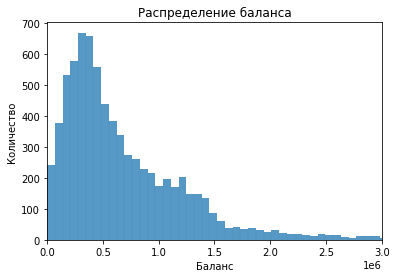

In [11]:
sns.histplot(df['balance'])
plt.title('Распределение баланса')
plt.xlabel('Баланс')
plt.xlim((0, 3*1e6))
plt.ylabel('Количество')
plt.show()

В датасете убраны пропуски в возрасте, в балансе пока оставлены. Всего строк 9974.

In [12]:
#df = df.dropna(subset=['balance'])

In [13]:
#df.isna().sum()

In [14]:
#df.info()

<s>После удаления в датасете осталось 7695 строки, 2305 удалено.</s>

### Проведем проверку на явные и неявные дубликаты

In [15]:
df.duplicated().sum()

0

In [16]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Исследовать дубликаты отдельно в категориальных значениях city, gender, age, equity, products, credit_card, last_activity, churn не имеет смысла. Посмотрим дубликаты в остальных столбцах.

In [17]:
t = df[df.duplicated(['userid'])]
t

userid  score       city gender  age  equity     balance  products  \
1583  190253    726  Ярославль      М   49       0         NaN         1   
1837  210662    896    Рыбинск      Ж   37       0         NaN         2   
2138  131419    739    Рыбинск      Ж   37       3  1307941.65         3   
2302  220816    934    Рыбинск      Ж   74       5  1294285.39         3   
2998  208081    821    Рыбинск      Ж   62       3   493608.26         2   
3039  170312    813    Рыбинск      Ж   47       3   370027.67         2   
3106  185748    912  Ярославль      Ж   47       5  1598218.98         2   
3817  211130    918    Рыбинск      Ж   55       0         NaN         2   
4186  217643    804    Рыбинск      Ж   40       2   301836.65         2   
4216  226719    903    Рыбинск      Ж   63       0         NaN         1   
4870  197364    889  Ярославль      М   33       0         NaN         2   
5197  155765    923    Рыбинск      М   30       0         NaN         1   
5420  126368    832    Рыбинск      Ж   33       0         NaN         1   
5557  143592    764  Ярославль      Ж   68       3   508919.15         2   
5569  141265    811    Рыбинск      Ж   33       3  1044316.88         2   
5570  208815    773  Ярославль      М   39       4   288110.09         2   
5705  152479    723  Ярославль      Ж   22       0         NaN         1   
5807  217619    766  Ярославль      М   52       2   218199.47         1   
5840  208738    839  Ярославль      М   60       5  1102438.37         2   
5896  120258    905  Ярославль      М   30       0         NaN         1   
6005  188957    882    Рыбинск      Ж   64       3   893392.91         3   
6756  172142    751    Рыбинск      Ж   69       3   396568.03         2   
6786  163207    838  Ярославль      Ж   42       4   652776.60         2   
7271  164676    790    Рыбинск      Ж   77       1   111202.01         1   
7487  140377    930    Рыбинск      Ж   34       5  1123967.02         1   
7542  117943    880  Ярославль      Ж   40       0         NaN         1   
7694  116540    887  Ярославль      Ж   38       0         NaN         1   
7814  210792    839  Ярославль      М   42       2   662646.97         1   
7931  191520    767  Ярославль      М   45       0         NaN         1   
8272  149365    793    Рыбинск      Ж   61       0   476496.99         2   
8364  148826    909    Рыбинск      Ж   32       0         NaN         3   
8497  227795    839  Ярославль      М   34       2   326593.14         2   
8521  210627    804    Рыбинск      М   30       2   347818.88         3   
8638  123461    934    Рыбинск      М   34       0         NaN         2   
8705  181526    895    Рыбинск      М   29       0         NaN         1   
8733  162053    786  Ярославль      М   29       4   205824.97         3   
8822  199312    911    Рыбинск      Ж   43       0         NaN         2   
9146  183510    800    Рыбинск      Ж   42       7   473293.81         2   
9175  200863    832  Ярославль      М   42       5   620064.73         2   
9267  150667    931  Ярославль      М   41       0         NaN         1   
9363  155872    714    Рыбинск      Ж   29       0         NaN         1   
9406  217826    790    Рыбинск      Ж   46       4   430414.80         2   
9504  129785    949  Ярославль      М   43       0         NaN         1   
9508  160075    824    Рыбинск      Ж   57       3   355047.33         2   
9653  171751    862  Ярославль      М   42       4   481992.19         2   
9659  195884    767    Рыбинск      Ж   45       1   335652.56         3   
9775  124450    758    Рыбинск      Ж   36       0    73574.07         2   
9785  168998    895    Рыбинск      М   44       0   282653.53         3   
9880  217412    886  Ярославль      Ж   35       3  1026172.14         2   
9970  175730    816    Рыбинск      М   36       4   477892.07         3   

      credit_card  last_activity  est_salary  churn  
1583            1              1   177700.78      0  
1837            0    

Есть дубликаты по userid. Исследуем эти дубликаты в разрезе городов, баланса и дохода.

In [18]:
t = df[df.duplicated(['userid', 'city'])]
t

Empty DataFrame
Columns: [userid, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []

In [19]:
t = df[df.duplicated(['userid', 'balance'])]
t

Empty DataFrame
Columns: [userid, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []

In [20]:
t = df[df.duplicated(['userid', 'est_salary'])]
t

Empty DataFrame
Columns: [userid, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []

In [21]:
t = df[df.duplicated(['userid', 'churn'])]
t

Empty DataFrame
Columns: [userid, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []

Выведем пример дубликата по userid.

In [22]:
t = df.query('userid == 131419')
t

userid  score       city gender  age  equity     balance  products  \
904   131419    934  Ярославль      М   35       5  2348335.95         2   
2138  131419    739    Рыбинск      Ж   37       3  1307941.65         3   

      credit_card  last_activity  est_salary  churn  
904             0              0   217105.13      1  
2138            0              0   103867.47      0

Дубликаты по userid явно связаны с разными городами. Вернее всего это один и тот же клиент, который обращался в банк в разных городах. Баланс в более поздней строки датасета имеет значение NaN. Скорее всего это в первом городе он закрыл счета, во втором открыл, т.к. это все города Ярославской области. Более точной информации у нас нет, и подтвердить данное предположение нет возможности, поэтому оставим дубликаты по id.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Исследовательский анализ данных

### Общее количество оттока клиентов у банка и его доля

Общее количество оттока.

In [23]:
df['churn'].sum()

1819

Доля оттока из общего количества клиентов.

In [24]:
df['churn'].sum() / 9974 * 100

18.237417284940847

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Корреляционный анализ

Построим корреляционную матрицу, используя phik_matrix метод.

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


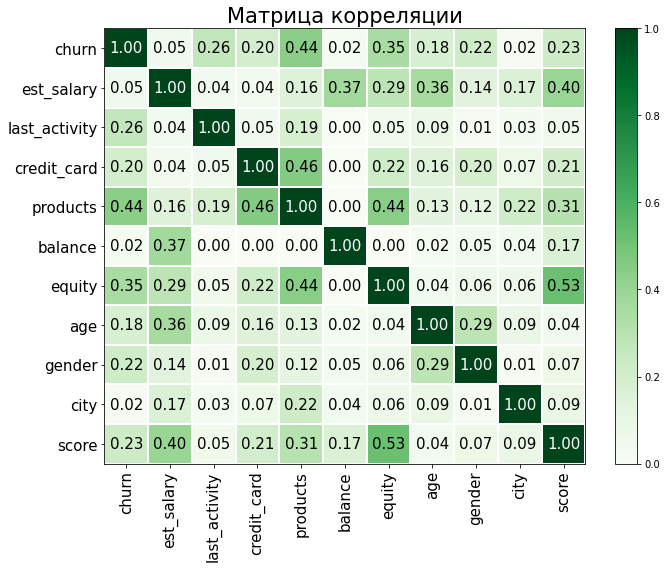

In [25]:
phik_overview = df.drop('userid', axis = 1).phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляции", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

Из матрицы корреляций видно, что есть зависимости между собственностью и кредитным скором, собственностью и продуктами, доходом и кредитным скором, доходом и возрастом.

Но нас интересуют зависимости оттока клиентов от его характеристик. 

Отток коррелирует с продуктами, собственностью, активностью, скором, полом, кредитной картой и возрастом.

Нет корреляции с городом, доходом и балансом.

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Все импорты нужно размещать в одной ячейке в начале работы, user_id не является признаком и не должен попасть в матрицу корреляций</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Сделано </div>

 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

<div class="alert alert-info"> <b>🎓 Комментарий студента V2:</b> Поправила выводы после того, как вернула в датасет Nan в балансе </div>

### Корреляции

Проверим корреляции с характеристиками:

- кредитный скоринг
- город
- пол
- возраст
- оценка собственности клиента
- баланс
- количество продуктов
- наличие кредитной карты
- активность
- доход

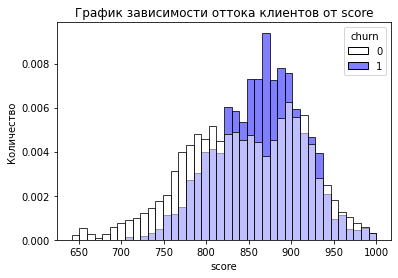

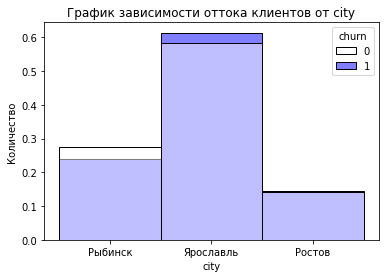

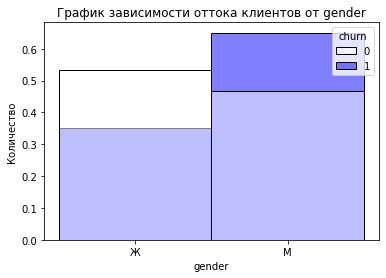

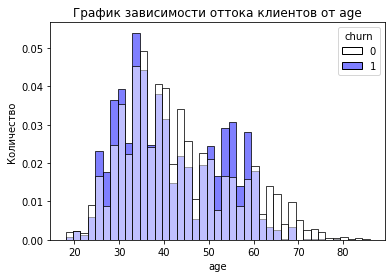

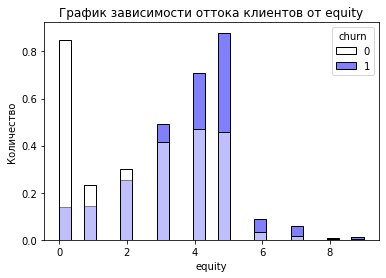

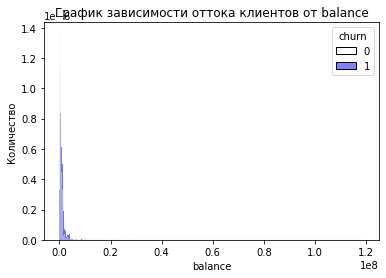

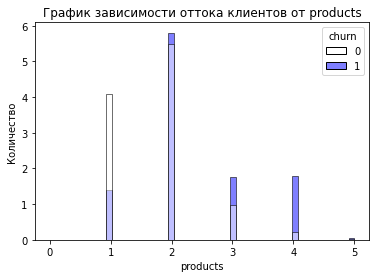

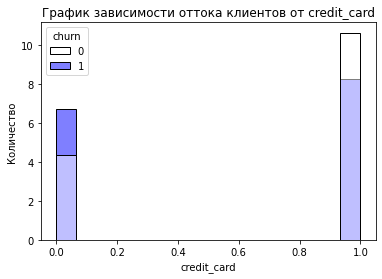

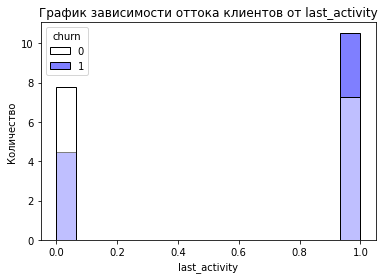

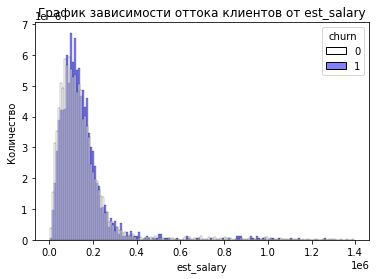

In [26]:
columns = ['score', 'city', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary']

for col in columns:
    sns.histplot(data=df, hue='churn', x=col, stat='density', common_norm=False, palette='flag')
    plt.ylabel('Количество')
    plt.title(f'График зависимости оттока клиентов от {col}')
    plt.show()

1. Зависимость от кредитного скоринга: отток значительный при кредитном скоринге 830-940.

2. Зависимость от города: в Ярославле отток больше. Ярославль - это столица области, общее количество клиентов значительно превышает Рыбинск и Ростов.

3. Зависимость от пола: среди мужчин отток выше.

4. Зависимость от возраста: отток есть в группе 25-60 лет.

5. Зависимость от оценки собственности клиента: оценки выше 3х отток значительный. Больше всего при оценке 5. Оценки 3, 4, 5, 6, 7 - наиболее высокий отток.

6. Зависимость от баланса: есть выбросы, корреляцию сложно отследить.

7. Зависимость от количества продуктов: отток есть при количестве продуктов 2, 3, 4 и 5. При количестве 4 - самый высокий отток.

8. Зависимость от кредитной карты: при отсутствии кредитной карты отток выше. 

9. Зависимость от активности: отток выше при активности.

10. Зависимость от дохода: есть выбросы, корреляцию сложно отследить.

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Зависимость от зарплаты нужно посмотреть без "хвоста"
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Сделаю ниже отдельным пунктом (п. 7.7) </div>

<div class="alert alert-info"> <b>🎓 Комментарий студента V2:</b> Поправила выводы после того, как вернула в датасет Nan в балансе </div>

### Корреляции по городам


Проведем исследование оттока с разбивкой по городам, добавим в сводную таблицу общее количество клиентов (total), и процент ушедших от общего количества (share).

In [27]:
t = df.query(
    'churn == 1').groupby(
    'city').agg(
    {'userid':'count'}).sort_values(by=('userid'), ascending=True).rename(columns={'userid':'count'})
t['total'] = df.groupby('city').agg({'userid':'count'}).sort_values(by=('userid'), ascending=False)['userid']
t['share'] = t['count'] / t['total'] * 100
t = t.sort_values(by=('share'), ascending=True).reset_index()
t

city  count  total      share
0    Рыбинск    437   2683  16.287738
1     Ростов    265   1416  18.714689
2  Ярославль   1117   5875  19.012766

Явной корреляции по городам нет. Ярославль как столица области лидирует.

### Корреляции по возрасту

Выявим возрастные группы, которые представлены в данных

<AxesSubplot:xlabel='age', ylabel='Density'>

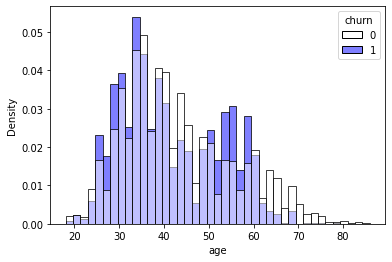

In [28]:
sns.histplot (data=df, 
              hue='churn', 
              x='age', 
              stat='density', 
              common_norm=False, 
              palette='flag')

Из гистограммы видно, что отток идет больше от 24 до 60 лет. 

От 18-23 и 61-86 оттока нет.

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Категории нужно выделять с учетом оттока</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Выделила все группы по возрасту, а ниже определила высокоотточные </div> 

Выделим следующие категории:
- 18-23 лет
- 24-34 лет
- 35-48 лет
- 49-60 лет
- 61-86 лет

Используем функцию с именем categorize_age() и метод apply().

In [29]:
def categorize_age(age):
    try:
        if 18 <= age <= 23:
            return '18-23'
        elif 24 <= age <= 34:
            return '24-34'
        elif 35 <= age <= 48:
            return '35-48'
        elif 49 <= age <= 60:
            return '49-60'
        elif 61 <= age <= 86:
            return '61-86'        
    except:
        pass

In [30]:
df_1 = df.copy()

In [31]:
df_1['age_category'] = df_1['age'].apply(categorize_age)

Посмотрим и сравним доли оттока в возрастных группах.

In [32]:
t = df_1.query(
    'churn == 1').groupby(
    'age_category').agg(
    {'userid':'count'}).sort_values(by=('userid'), ascending=True).rename(columns={'userid':'count'})
t['total'] = df_1.groupby('age_category').agg({'userid':'count'}).sort_values(by=('userid'), ascending=False)['userid']
t['share'] = t['count'] / t['total'] * 100
t = t.sort_values(by=('age_category'), ascending=True).reset_index()
t

age_category  count  total      share
0        18-23     18    147  12.244898
1        24-34    604   2756  21.915820
2        35-48    631   4084  15.450539
3        49-60    499   1954  25.537359
4        61-86     67   1033   6.485963

Группы 18-23 и 61-86 как показала гистограмма и анализ данных доля оттока из общего числа низкая. 

Также и у группы 35-48 доля оттока ниже общей доли оттока по датасету. 

Таким образом, высокоотточные группы: 24-34 и 49-60.

<div class="alert alert-info"> <b>🎓 Комментарий студента V2:</b> Поправила выводы. </div>

### Корреляции по балансу 

<AxesSubplot:xlabel='balance', ylabel='Density'>

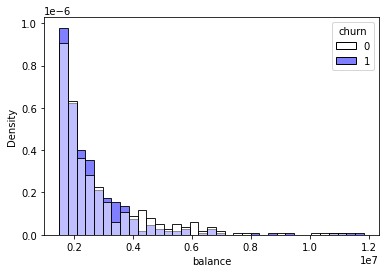

In [33]:
t = df.query('balance > 1500000 and balance < 12000000')
sns.histplot (data=t, 
              hue='churn', 
              x='balance', 
              stat='density', 
              common_norm=False, 
              palette='flag')

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Здесь тоже нужно смотреть на распределение оттока</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Выделила все группы по балансу, а ниже определила высокоотточные </div> 

In [34]:
def categorize_balance(balance):
    try:
        if 0 <= balance <= 1500000:
            return '0 - 1.5 млн'
        elif 1500000 < balance <= 4000000:
            return '1.5 млн - 4 млн'
        elif 4000000 < balance <= 8000000:
            return '4 млн - 8 млн'
        elif 8000000 < balance <= 120000000:
            return '8 млн - 120 млн'               
    except:
        pass

In [35]:
df_1['balance_category'] = df_1['balance'].apply(categorize_balance)

In [36]:
t = df_1.query(
    'churn == 1').groupby(
    'balance_category').agg(
    {'userid':'count'}).sort_values(by=('userid'), ascending=True).rename(columns={'userid':'count'})
t['total'] = df_1.groupby('balance_category').agg({'userid':'count'}).sort_values(by=('userid'), ascending=False)['userid']
t['share'] = t['count'] / t['total'] * 100
t = t.sort_values(by=('balance_category'), ascending=True).reset_index()
t

balance_category  count  total      share
0      0 - 1.5 млн   1446   6976  20.728211
1  1.5 млн - 4 млн    322    608  52.960526
2    4 млн - 8 млн     24     80  30.000000
3  8 млн - 120 млн     14     31  45.161290

Большая доля оттока в группе по балансу 1,5 млн-4 млн.

Группы больше 4 млн. малочисленны.

 ### Корреляции по доходу

<AxesSubplot:xlabel='est_salary', ylabel='Density'>

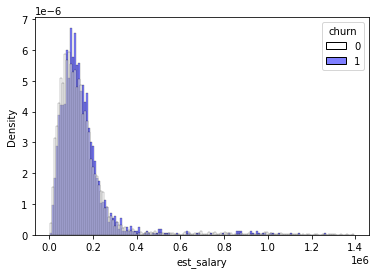

In [37]:
sns.histplot (data=df, 
              hue='churn', 
              x='est_salary', 
              stat='density', 
              common_norm=False, 
              palette='flag')

<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Посмотри подробней на значения без "хвоста" и определи отточные интервалы признака</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Выделила все группы по доходу, а ниже определила высокоотточные </div> 

In [38]:
df['est_salary'].min()

2546.3

In [39]:
df['est_salary'].max()

1395064.45

<AxesSubplot:xlabel='est_salary', ylabel='Density'>

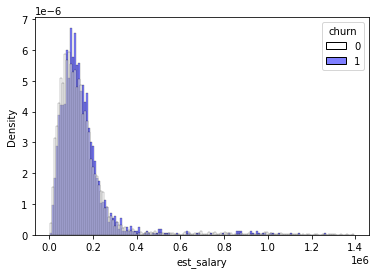

In [40]:
sns.histplot (data=df, 
              hue='churn', 
              x='est_salary', 
              stat='density', 
              common_norm=False, 
              palette='flag')

In [41]:
def categorize_est_salary(est_salary):
    try:
        if 0 <= est_salary <= 90000:
            return '1. 0 - 90 тыс'        
        elif 90000 < est_salary <= 300000:
            return '2. 90 тыс - 300 тыс'
        elif 300000 < est_salary <= 600000:
            return '3. 300 тыс - 600 тыс'
        elif 600000 < est_salary <= 1400000:
            return '4. 600 тыс - 1,4 млн'                      
    except:
        pass

In [42]:
df_1['est_salary_category'] = df_1['est_salary'].apply(categorize_est_salary)

In [43]:
t = df_1.query(
    'churn == 1').groupby(
    'est_salary_category').agg(
    {'userid':'count'}).sort_values(by=('userid'), ascending=True).rename(columns={'userid':'count'})
t['total'] = df_1.groupby('est_salary_category').agg({'userid':'count'}).sort_values(by=('userid'), ascending=False)['userid']
t['share'] = t['count'] / t['total'] * 100
t = t.sort_values(by=('est_salary_category'), ascending=True).reset_index()
t

est_salary_category  count  total      share
0         1. 0 - 90 тыс    526   3342  15.739078
1   2. 90 тыс - 300 тыс   1198   6070  19.736409
2  3. 300 тыс - 600 тыс     67    336  19.940476
3  4. 600 тыс - 1,4 млн     28    226  12.389381

<AxesSubplot:xlabel='est_salary', ylabel='Density'>

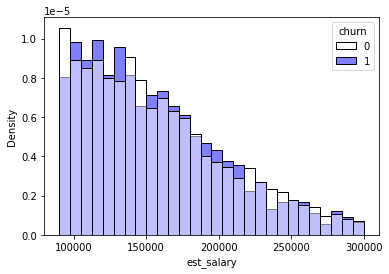

In [44]:
sns.histplot (data=df.query('est_salary > 90000 and est_salary < 300000'), 
              hue='churn', 
              x='est_salary', 
              stat='density', 
              common_norm=False, 
              palette='flag')

Высокий отток в группе по доходу 90 тыс-300 тыс. 

Также высокая доля оттока в группах больше 300 тыс., но эта группа малочисленная по ооставу клиентов.

 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

<div class="alert alert-info"> <b>🎓 Комментарий студента V2:</b> Немного поправила порог первой группы с 40тыс на 90 тыс </div>

### Портреты клиентов и их сравнение

#### Общий портрет клиентов

Используем для портрета клиентов следующие характеристики: город, пол, возраст, доход, кредитный скор, активность и наличие кредитной карты.

In [45]:
t = df.groupby(
    ['city', 'gender']).agg(
    {'userid':'count', 'age':'mean', 'score':'mean', 'est_salary':'mean', 'credit_card':'mean', 'last_activity':'mean'}).sort_values(
    by=('userid'), ascending=True).rename(columns={'userid':'count'})
t

count        age       score     est_salary  credit_card  \
city      gender                                                             
Ростов    М         683  41.143485  843.874085  119500.742606     0.631040   
          Ж         733  46.934516  841.493861  104080.675525     0.508868   
Рыбинск   М        1309  40.576776  847.449962  144025.455111     0.684492   
          Ж        1374  45.944687  849.690684  125962.761441     0.600437   
Ярославль Ж        2876  44.624826  848.759736  149410.537229     0.659944   
          М        2999  39.728243  851.536846  174994.544138     0.787262   

                  last_activity  
city      gender                 
Ростов    М            0.516837  
          Ж            0.545703  
Рыбинск   М            0.560733  
          Ж            0.564774  
Ярославль Ж            0.508345  
          М            0.496832

**Вывод**

Согласно проведенного анализа выявлены портреты клиентов банка среди городов и между мужчин и женщин. 

Сравним клиентов:
- возраст у всех клиентов от 40 до 46 лет
- женщин больше в двух городах, кроме Ярославля
- кредитный скор от 841 до 849
- доход 104 т - 174 т
- наличие кредитной карты у всех клиентов больше 0,5, значит ближе показатель наличия кредитной карты
- активность у всех 0,5, значит примерно одинаковое количество как активных так и неактивных клиентов.

Показатели количества клиентов и дохода в Ярославле выше, т.к. это столица региона.


#### Портрет отточных клиентов

In [46]:
t = df.query('churn == 1').groupby(
    ['city', 'gender']).agg(
    {'userid':'count', 'age':'mean', 'score':'mean', 'est_salary':'mean', 'credit_card':'mean', 'last_activity':'mean'}).sort_values(
    by=('city'), ascending=True).rename(columns={'userid':'count'})
t

count        age       score     est_salary  credit_card  \
city      gender                                                             
Ростов    Ж          90       43.6  858.144444  125133.983667     0.377778   
          М         175       42.4  852.222857  122905.825029     0.560000   
Рыбинск   Ж         139  46.280576  861.244604  119516.804317     0.359712   
          М         298  40.473154  863.211409  139156.541644     0.580537   
Ярославль Ж         407  42.299754  868.427518  149168.798329     0.474201   
          М         710  39.921127   864.48169  166443.949718     0.640845   

                  last_activity  
city      gender                 
Ростов    Ж            0.722222  
          М            0.628571  
Рыбинск   Ж            0.776978  
          М            0.724832  
Ярославль Ж            0.818182  
          М            0.626761

**Вывод**

Согласно проведенного анализа выявлены портреты отточных клиентов банка среди городов и между мужчин и женщин. 

Сравним клиентов:
- возраст у всех клиентов от 40 до 46 лет
- мужчин больше в каждом городе
- кредитный скор от 852 до 868
- доход 119 т - 166 т
- наличие кредитной карты у женщин меньше 0,5, значит кредитная карта отсутствует, у мужчин больше 0,5, значит ближе показатель наличия кредитной карты
- активность у всех больше 0,5, значит клиенты активны.

Показатели количества клиентов и дохода в Ярославле выше, т.к. это столица региона.

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Добавила портрет клиентов </div>

<div class="alert alert-info"> <b>🎓 Комментарий студента V2:</b> Немного поправила выводы после того, как в датасете оставила NaN по балансу </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Проверка статистических гипотез

### Отток зависит от возраста

Проверим гипотезу: отток зависит от возраста.

Сформулируем гипотезы.

Нулевая гипотеза: Возраст ушедших и оставшихся клиентов одинаков.

Альтернативная гипотеза: Возраст ушедших и оставшихся клиентов различен.

In [47]:
before = df.query('churn == 1')['age'].to_list()

after = df.query('churn == 0')['age'].to_list()

print(f'Количество 1 выборки: {len(before)}\nКоличество 2 выборки: {len(after)}\n')

alpha = .05 # критический уровень статистической значимости

results = scipy.stats.ttest_ind(
    before, 
    after)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Количество 1 выборки: 1819
Количество 2 выборки: 8155

p-значение:  6.503036883995611e-07
Отвергаем нулевую гипотезу


<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Импорты нужно перенести в начало работы</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Сделано </div>

 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

### Отток зависит от уровня дохода

Проверим гипотезу: отток зависит от уровня дохода.

Сформулируем гипотезы.

Нулевая гипотеза: Доход клиентов между теми клиентами, которые ушли и теми, которые остались равен.

Альтернативная гипотеза: Доход клиентов между теми клиентами, которые ушли и теми, которые остались различен.

In [48]:
before = df.query('churn == 1')['est_salary'].to_list()

after = df.query('churn == 0')['est_salary'].to_list()

print(f'Количество 1 выборки: {len(before)}\nКоличество 2 выборки: {len(after)}\n')

alpha = .05 # критический уровень статистической значимости

results = scipy.stats.ttest_ind(
    before, 
    after)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Количество 1 выборки: 1819
Количество 2 выборки: 8155

p-значение:  0.8647861589211189
Не получилось отвергнуть нулевую гипотезу


 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>

## Сегментация

Выделим наиболее значительные характеристики в сегменты и построим графики.

**Сегмент - клиенты мужчины с кредитным скором 830-950**

In [49]:
def categorize_est_score(score):
    try:
        if 0 <= score <= 830:
            return '0 - 830'
        elif 830 < score <= 950:
            return '830 - 950'
        elif 950 < score <= 1000:
            return '950 - 1000'                      
    except:
        pass

In [50]:
df_1['score_category'] = df_1['score'].apply(categorize_est_score)

In [51]:
t = df_1.query(
    'churn == 1 and gender == "М"').groupby(
    'score_category').agg(
    {'userid':'count'}).sort_values(
    by=('userid'), ascending=True).rename(columns={'userid':'count'})
t['total'] = df_1.query(
    'gender == "М"').groupby(
    'score_category').agg({'userid':'count'}).sort_values(by=('userid'), ascending=False)['userid']
t['share'] = t['count'] / t['total'] * 100
t = t.sort_values(by=('score_category'), ascending=True).reset_index()
t

score_category  count  total      share
0        0 - 830    332   1937  17.139907
1      830 - 950    812   2822  28.773919
2     950 - 1000     39    232  16.810345

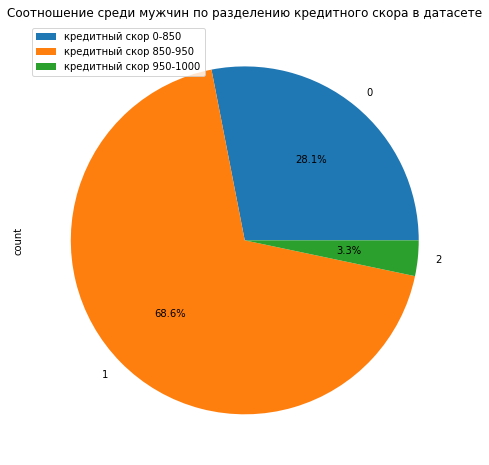

In [52]:
t.plot(y='count', kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Cоотношение среди мужчин по разделению кредитного скора в датасете')
plt.legend(['кредитный скор 0-850', 'кредитный скор 850-950', 'кредитный скор 950-1000'])

**Вывод**

Сегмент: клиенты мужчины с кредитным скором 830-950 высокоотточен.

**Сегмент - активные клиенты с возрастом**

In [53]:
t = df_1.query(
    'churn == 1 and last_activity == 1').groupby(
    'age_category').agg(
    {'userid':'count'}).sort_values(
    by=('userid'), ascending=True).rename(columns={'userid':'count'})
t['total'] = df_1.query(
    'last_activity == 1').groupby('age_category').agg({'userid':'count'}).sort_values(by=('userid'), ascending=False)['userid']
t['share'] = t['count'] / t['total'] * 100
t = t.sort_values(by=('share'), ascending=True).reset_index()
t

age_category  count  total      share
0        61-86     38    578   6.574394
1        18-23     15     85  17.647059
2        35-48    429   2022  21.216617
3        49-60    315   1004  31.374502
4        24-34    480   1526  31.454784

Text(0, 0.5, 'Доля оттока из общего количества клиентов')

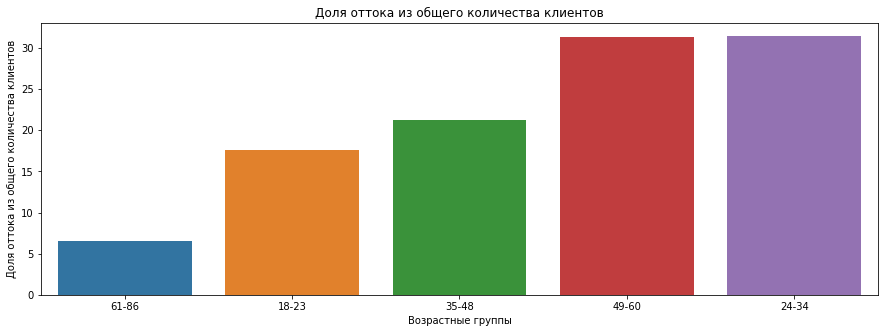

In [54]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='age_category', y='share', data=t)
plt.title('Доля оттока из общего количества клиентов')
plt.xlabel('Возрастные группы')
plt.ylabel('Доля оттока из общего количества клиентов')

**Вывод**

Сегмент: возраст клиента 24-34 и 49-60 и активность высокоотточен.

**Сегмент - клиенты с доходом от 90 т. до 300 т. по кредитному скору 830-950**

In [55]:
t = df_1.query(
    'churn == 1 and est_salary > 90000 and est_salary < 300000').groupby(
    'score_category').agg(
    {'userid':'count'}).sort_values(
    by=('userid'), ascending=True).rename(columns={'userid':'count'})
t['total'] = df_1.query(
    'est_salary > 90000 and est_salary < 300000').groupby('score_category').agg({'userid':'count'}).sort_values(by=('userid'), ascending=False)['userid']
t['share'] = t['count'] / t['total'] * 100
t = t.sort_values(by=('score_category'), ascending=True).reset_index()
t

score_category  count  total      share
0        0 - 830    251   2148  11.685289
1      830 - 950    930   3730  24.932976
2     950 - 1000     17    192   8.854167

Text(0, 0.5, 'Кредитный скор')

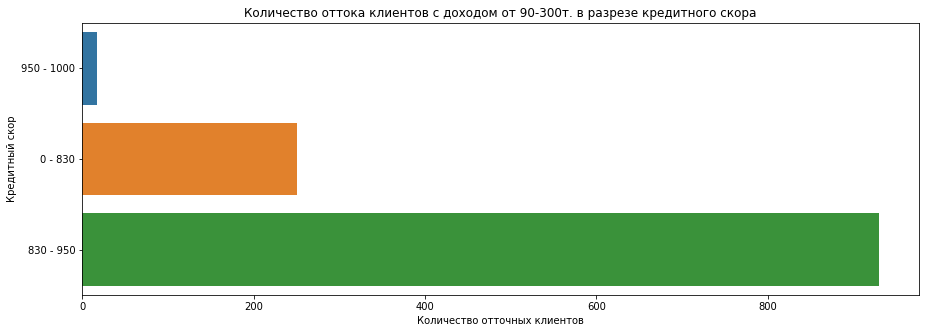

In [56]:
t = t.sort_values(by=('count'), ascending=True).reset_index()
plt.figure(figsize=(15,5))
ax = sns.barplot(x='count', y='score_category', data=t)
plt.title('Количество оттока клиентов с доходом от 90-300т. в разрезе кредитного скора')
plt.xlabel('Количество отточных клиентов')
plt.ylabel('Кредитный скор')

**Вывод**

Сегмент: клиенты с доходом 90-300 т. и кредитным скором 850-950 высокоотточен.

 <div class="alert alert-danger">
 <b>😔 Необходимо исправить V2:</b> Нужно комбинировать несколько признаков, на основе исследования выше, в сегментах 1 и 2 отток не сильно отличается от среднего по банку
 </div>

<div class="alert alert-info"> <b>🎓 Комментарий студента V2:</b> предыдущие сегменты оставила в качестве исследования, поправила в них формулу общей доли. А также выделила 4 сегмента на основе матрицы корреляции </div>

Выделим признаки и сопоставим их вместе по матрице корреляций

**Признаки:**

equity >= 3

equity = 5

products >= 2

products = 4

gender == "М"

last_activity == 1 

score >= 830 and score <=950

credit_card == 0

age >= 24 and age <= 60

age >= 24 and age <= 34

age >= 49 and age <= 60

### Сегмент 1 - отток зависит от продуктов, кредитной карты и собственности

In [57]:
#зададим условия для сегмента 
t = df.query('products >= 2 and equity >= 3 and credit_card == 0').groupby(
    'churn').agg(
    {'userid':'count'}).sort_values(
    by=('userid'), ascending=True).rename(columns={'userid':'count'})

t

count
churn       
1        695
0       1380

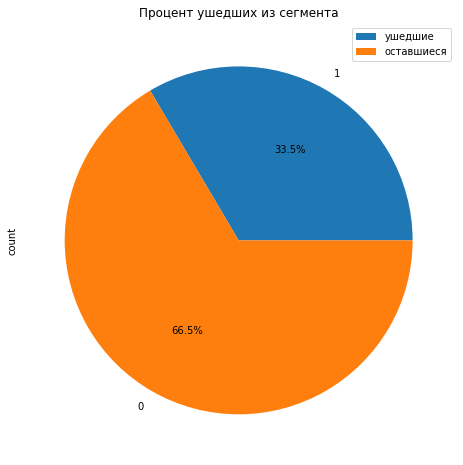

In [58]:
t.plot(y='count', kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Процент ушедших из сегмента')
plt.legend(['ушедшие', 'оставшиеся'])

Сегмент с признаками 'products >= 2 and equity >= 3 and credit_card == 0' высокоотточный 33,5%

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Сегмент 2 - отток зависит от скора, дохода и собственности

In [59]:
#зададим условия для сегмента 
t = df.query('score >= 830 and score <=950 and equity == 5 and est_salary > 90000 and est_salary < 300000').groupby(
    'churn').agg(
    {'userid':'count'}).sort_values(
    by=('userid'), ascending=True).rename(columns={'userid':'count'})

t

count
churn       
1        344
0        529

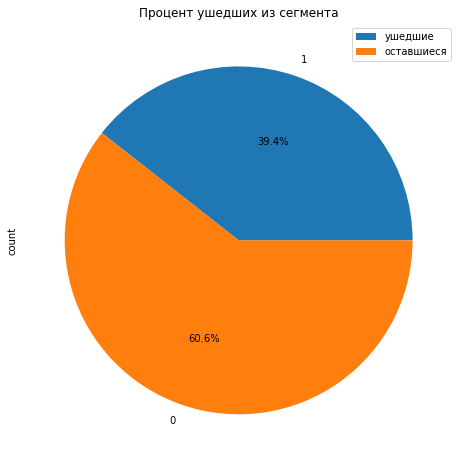

In [60]:
t.plot(y='count', kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Процент ушедших из сегмента')
plt.legend(['ушедшие', 'оставшиеся'])

Сегмент с признаками 'score >= 830 and score <=950 and equity == 5 and est_salary > 90000 and est_salary < 300000' высокоотточный 39,4%

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Сегмент 3 - отток зависит от пола, кредитной карты и возраста

In [61]:
#зададим условия для сегмента 
t = df.query('gender == "М" and credit_card == 0 and age >= 24 and age <= 60').groupby(
    'churn').agg(
    {'userid':'count'}).sort_values(
    by=('userid'), ascending=True).rename(columns={'userid':'count'})

t

count
churn       
1        436
0        781

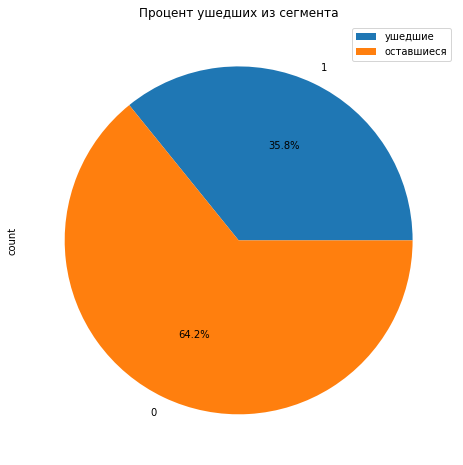

In [62]:
t.plot(y='count', kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Процент ушедших из сегмента')
plt.legend(['ушедшие', 'оставшиеся'])

Сегмент с признаками 'gender == "М" and credit_card == 0 and age >= 24 and age <= 60' высокоотточный 35,8%

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Сегмент 4 - отток зависит от активности и продуктов

In [63]:
#зададим условия для сегмента 
t = df.query('last_activity == 1 and products > 2').groupby(
    'churn').agg(
    {'userid':'count'}).sort_values(
    by=('userid'), ascending=True).rename(columns={'userid':'count'})

t

count
churn       
1        391
0        432

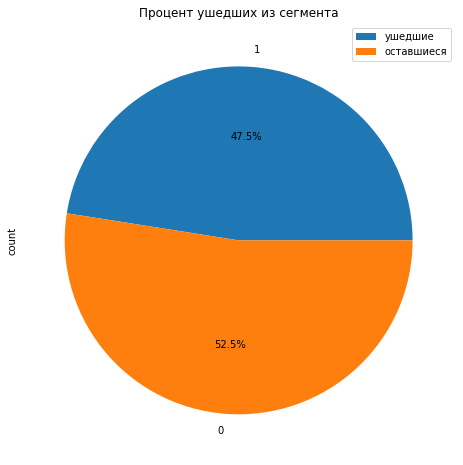

In [64]:
t.plot(y='count', kind='pie', figsize=(8,8), autopct='%1.1f%%')
plt.title('Процент ушедших из сегмента')
plt.legend(['ушедшие', 'оставшиеся'])

Сегмент с признаками 'last_activity == 1 and products > 2' высокоотточный 47,5%

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Кластеризация по машинному обучению

Выявим коррелиции признаков среди отточных клиентов. Количество кластеров n = 3.

Для начала нам нужно изменить строковые значения на числовые. У нас таких 2 столбца: пол и город

In [65]:
df_2 = df.copy()
df_2 = df_2.dropna(subset=['balance'])
df_2 = df_2.query('churn == 1')

In [66]:
def string_to_num(value):
    try:
        if value == 'Рыбинск':
            return 0
        elif value == 'Ярославль':
            return 1 
        elif value == 'Ростов':
            return 2   
        elif value == 'Ж':
            return 0   
        elif value == 'М':
            return 1
    except:
        pass

In [67]:
df_2['city'] = df_2['city'].apply(string_to_num)
df_2['gender'] = df_2['gender'].apply(string_to_num)

              score      city    gender        age    equity       balance  \
cluster                                                                      
0        943.314286  0.942857  0.771429  40.885714  4.542857  8.748735e+06   
1        886.961818  0.864545  0.606364  39.781818  4.434545  1.258768e+06   
2        821.043219  0.973174  0.713860  44.092399  2.690015  5.335031e+05   

         products  credit_card  last_activity     est_salary  
cluster                                                       
0        2.485714     0.514286       0.942857  778960.169429  
1        2.600000     0.387273       0.815455  150608.123809  
2        2.020864     0.816692       0.512668  108356.306200  


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


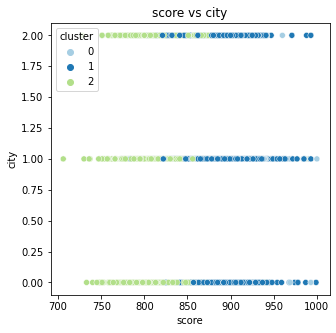

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


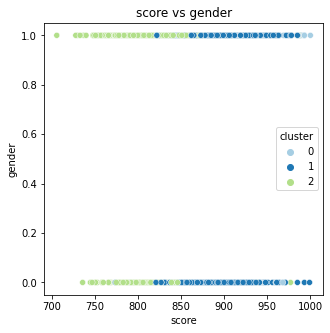

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


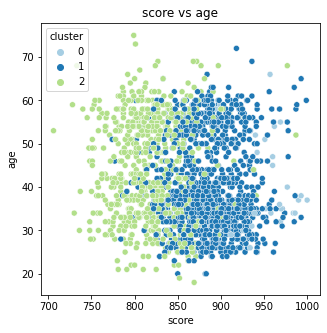

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


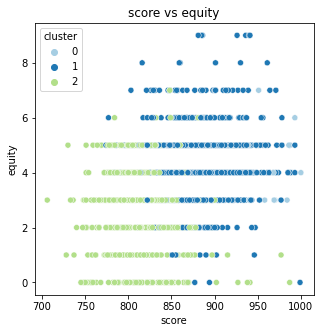

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


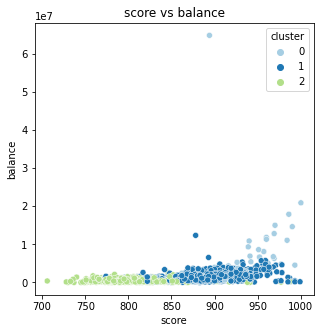

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


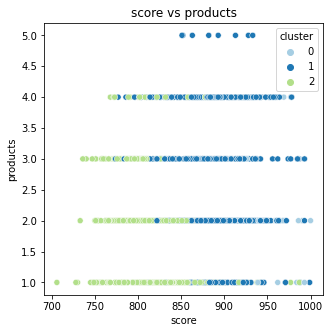

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


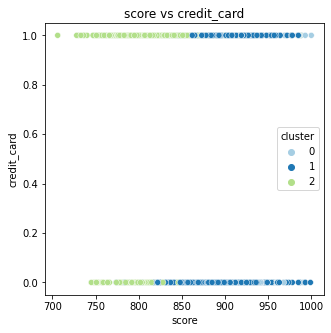

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


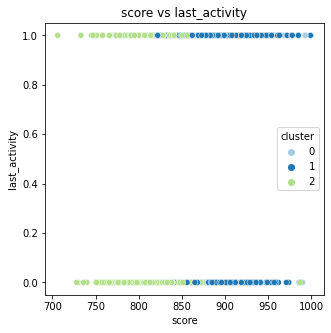

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


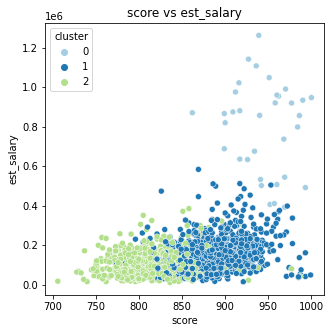

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


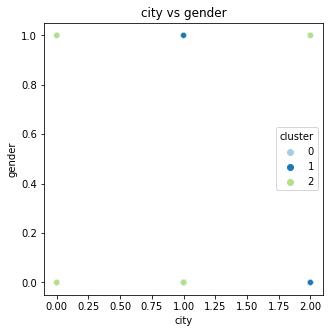

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


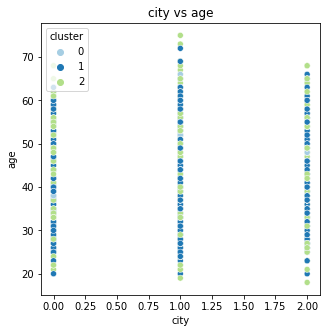

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


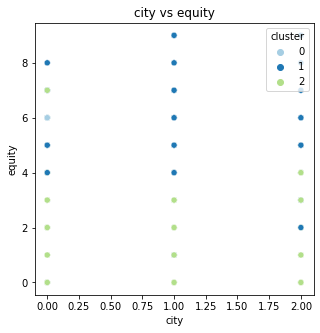

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


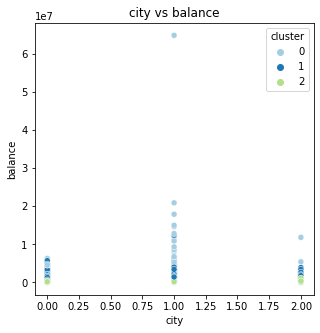

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


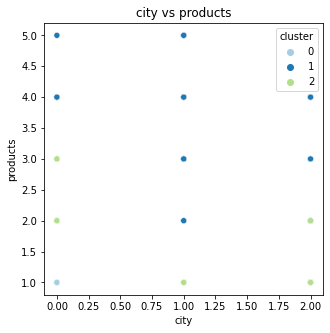

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


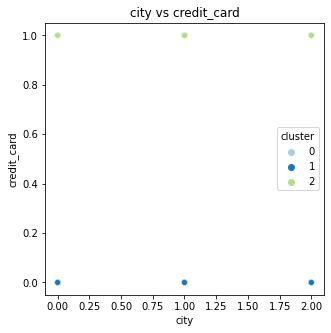

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


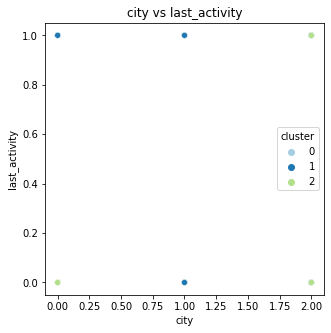

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


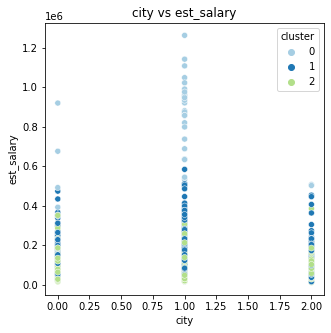

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


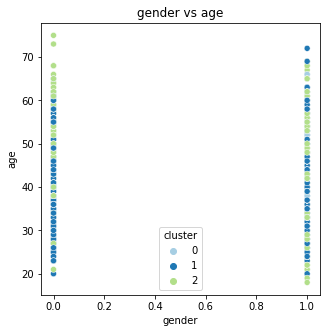

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


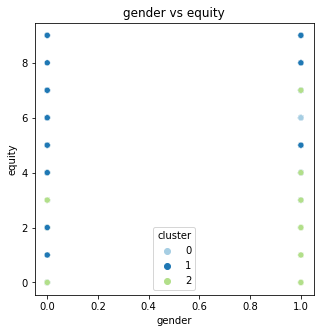

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


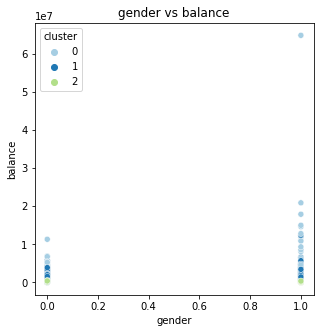

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


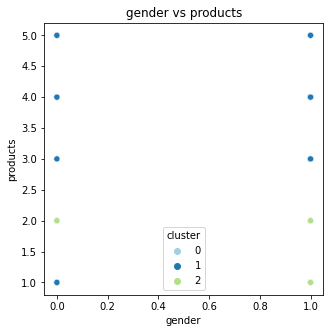

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


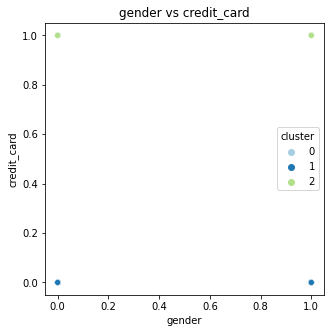

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


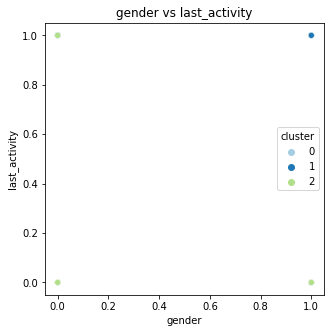

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


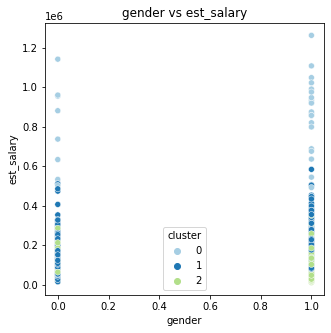

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


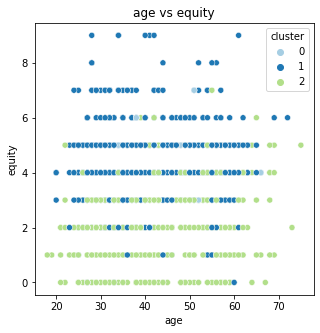

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


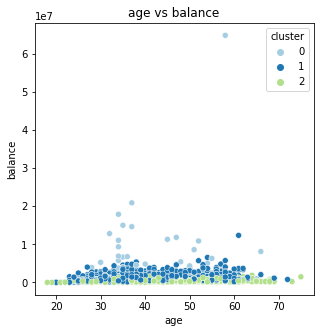

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


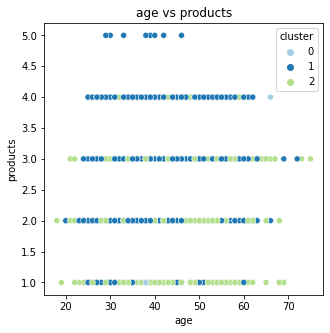

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


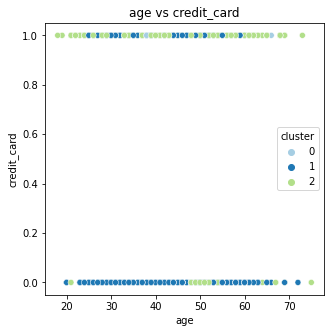

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


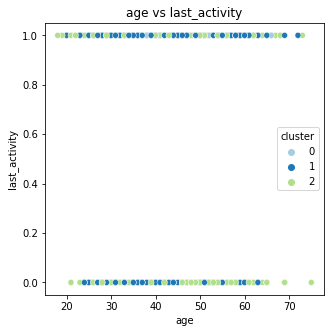

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


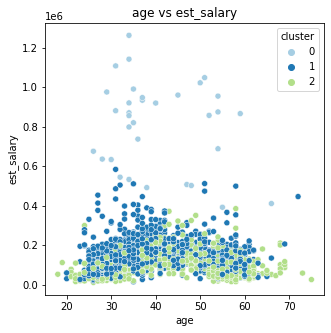

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


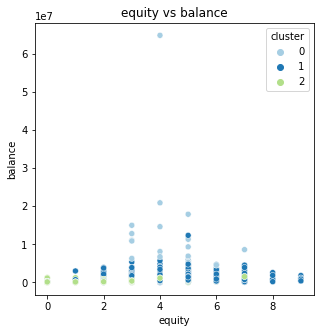

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


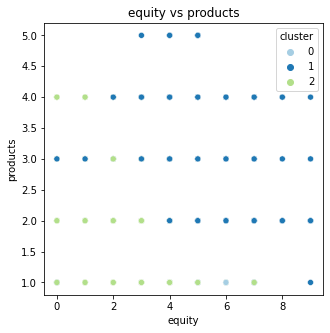

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


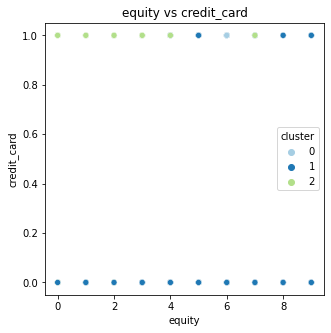

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


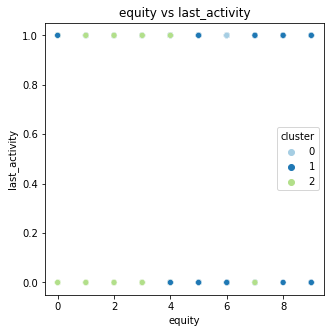

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


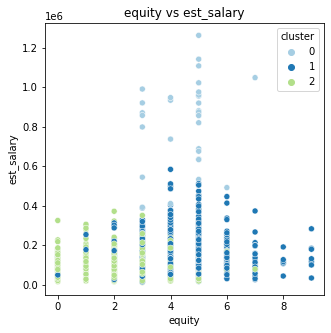

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


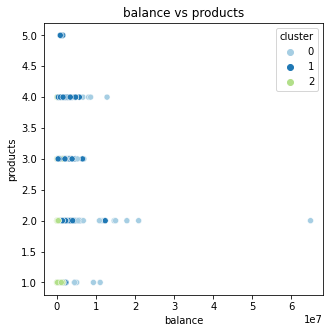

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


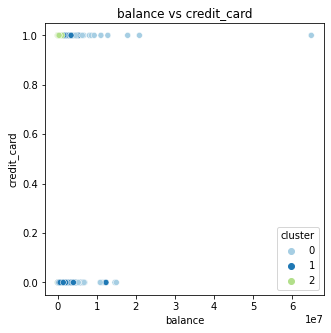

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


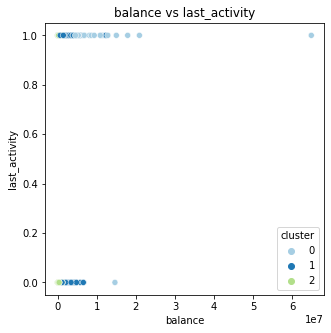

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


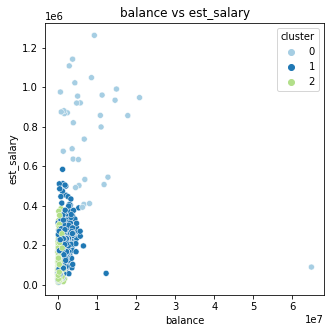

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


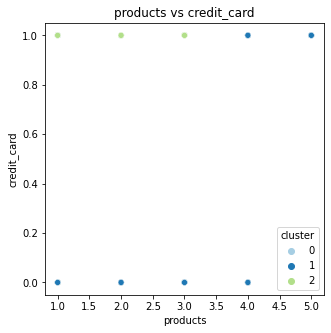

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


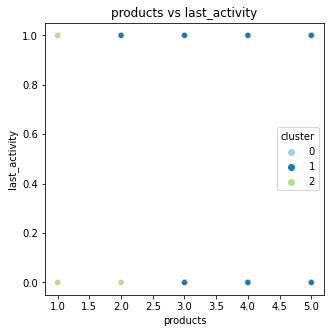

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


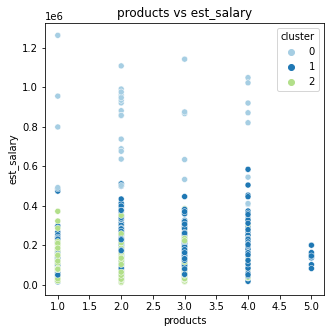

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


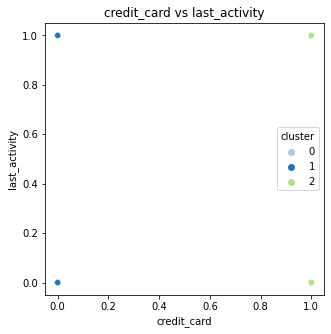

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


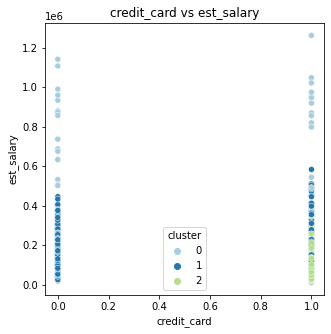

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


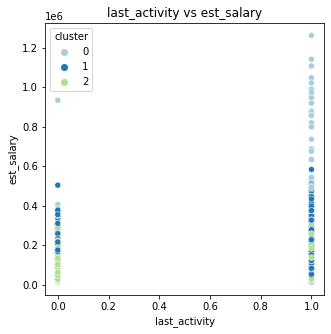

In [68]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

X = df_2.drop(['userid', 'churn'], axis=1)
y = df_2['userid']
    
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(X)

# задаём модель k_means с числом кластеров 3 и фиксируем значение random_state
km = KMeans(n_clusters=3, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
X['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
print(X.groupby('cluster').mean())

# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(X.drop('cluster', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(X, pair[0], pair[1], 'cluster')

## Выводы и рекомендации

В датасете было 10000 строк, после удаления пропусков осталось 9974 строк.

Представлены клиенты мужчины и женщины из 3х городов Ярославской области - Рыбинск, Ростов, Ярославль,  возраст от 18 до 86 лет.

Отток среди клиентов банка составил 1819 человек, что составляет 18% от общего количества.

**Корреляционный анализ выявил зависимости оттока от следующих характеристик:**
- количество продуктов, 
- собственность,
- активность, 
- кредитный скор,
- пол, 
- кредитная карта,
- возраст.

**Корреляции по признакам**
1. Зависимость от кредитного скоринга: отток значительный при кредитном скоринге 830-940.
2. Зависимость от города: явной корреляции по городам нет, в Ярославле отток больше. Ярославль - это столица области, общее количество клиентов значительно превышает Рыбинск и Ростов.
3. Зависимость от пола: среди мужчин отток выше.
4. Зависимость от возраста: отток есть в группе 25-60 лет. В группах 18-23, 35-48 и 61-86 доля оттока низкая. Таким образом, высокоотточные группы: 35-48 и 61-86.
5. Зависимость от оценки собственности клиента: оценки выше 3х отток значительный. Больше всего при оценке 5. Оценки 3, 4, 5, 6, 7 - наиболее высокий отток.
6. Зависимость от количества продуктов: отток есть при количестве продуктов 2, 3, 4 и 5. При количестве 4 - самый высокий отток.
7. Зависимость от кредитной карты: при отсутствии кредитной карты отток выше.
8. Зависимость от активности: отток выше при активности.
9. Зависимость от дохода: высокий отток в группе по доходу 90 тыс-300 тыс. Также высокая доля оттока в группах больше 300 тыс., но эта группа малочисленная по составу клиентов.
10. Зависимость от баланса: большая доля оттока в группе по балансу 1,5 млн-4 млн. Группы больше 4 млн. малочисленны.


**Портреты отточных клиентов:**
- возраст у всех клиентов от 40 до 46 лет
- мужчин больше в каждом городе
- кредитный скор от 852 до 868
- доход 119 т - 166 т
- - наличие кредитной карты у женщин меньше 0,5, значит кредитная карта отсутствует, у мужчин больше 0,5, значит ближе показатель наличия кредитной карты
- активность у всех больше 0,5, значит клиенты активны.

**Гипотезы:**
- Гипотеза: отток зависит от возраста.

Нулевая гипотеза: Возраст ушедших и оставшихся клиентов одинаков.
Альтернативная гипотеза: Возраст ушедших и оставшихся клиентов различен.
Отвергаем нулевую гипотезу.

- Гипотеза: отток зависит от уровня дохода.

Нулевая гипотеза: Доход клиентов между теми клиентами, которые ушли и теми, которые остались равен.
Альтернативная гипотеза: Доход клиентов между теми клиентами, которые ушли и теми, которые остались различен.
Не получилось отвергнуть нулевую гипотезу

**Выскооточные сегменты:**
1. Сегмент с признаками 'products >= 2 and equity >= 3 and credit_card == 0' высокоотточный 33,5%
2. Сегмент с признаками 'score >= 830 and score <=950 and equity == 5 and est_salary > 90000 and est_salary < 300000' высокоотточный 39,4%
3. Сегмент с признаками 'gender == "М" and credit_card == 0 and age >= 24 and age <= 60' высокоотточный 35,8%
4. Сегмент с признаками 'last_activity == 1 and products > 2' высокоотточный 47,5%

**Рекомендации:**
- уже ушедшим клиентам предложить вернуться, предоставив по имеющимся каналам связи информацию о продуктах на основании выявленных портретов клиента банка, а также оставить положительное впечатление о банке среди тех, кто точно ушел и не вернется
- выявленные сегменты находятся в зоне риска, таким клиентам должно быть повышенное внимание - информирование о продуктах, обратная связь, обучение по новым продуктам, уникальные предложения, скидки, сервис, бесплатное обслуживание и проч.
- улучшить сервис согласно жалобам и плохим отзывам (наладить обратную связь с клиентами, которые оставили жалобу или плохой отзыв, принести извинения, предложить бонус, скидки у партнеров)
- удержать тех, кто не входит в зону риска, т.к. это ценные клиенты для банка




## Презентация

Презентация: <https://disk.yandex.ru/i/wl4Znl3_4F2BAA>

<div class="alert alert-danger">
    <s><b>😔 Необходимо исправить:</b> Нужно выделить выскооточные сегменты</s>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Сделано </div>

<div class="alert alert-success">
<b>👍 Успех:</b> Хорошая работа, молодец! Все данные исследованы, много визуализации, сделаны выводы по всем разделам, достаточное количество рассуждений и комментариев, в презентации соблюден баланс текстовой и графической информации
</div>

In [71]:
df.to_csv('df.csv', index=False)